In [1]:
import numpy as np # had to downgrade NumPy to resolve compatiblity issue
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [4]:
housing.groupby('SaleCondition')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
SaleCondition,,,,,,,,
Abnorml,61.0,143739.754098,76041.592574,12789.0,112000.0,132000.0,167000.0,475000.0
AdjLand,2.0,138750.000000,15909.902577,127500.0,133125.0,138750.0,144375.0,150000.0
Alloca,4.0,156766.500000,15556.542214,142953.0,148920.0,152556.5,160403.0,179000.0
Family,17.0,146958.823529,41490.255766,82500.0,133000.0,149000.0,152000.0,235000.0
Normal,2414.0,175575.278790,70965.896790,35000.0,129500.0,159000.0,206675.0,755000.0
Partial,82.0,285172.121951,107858.129091,115000.0,198925.0,254146.5,360535.0,611657.0


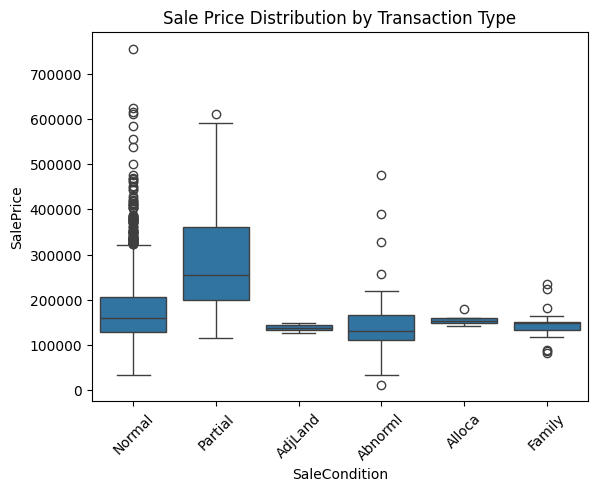

In [3]:
# Boxplot for comparing distributions
sns.boxplot(x='SaleCondition', y='SalePrice', data=housing)
plt.xticks(rotation=45)
plt.title("Sale Price Distribution by Transaction Type")
plt.show()

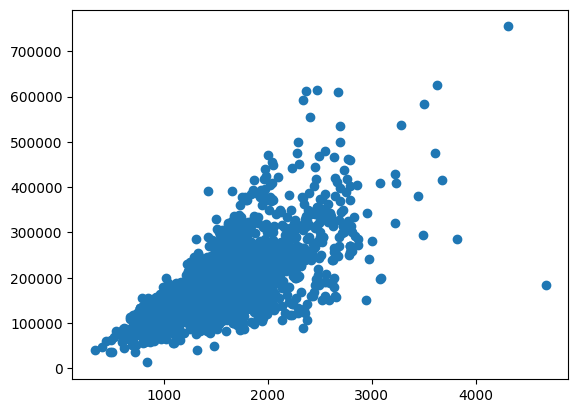

In [5]:
plt.scatter(housing.GrLivArea, housing.SalePrice)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

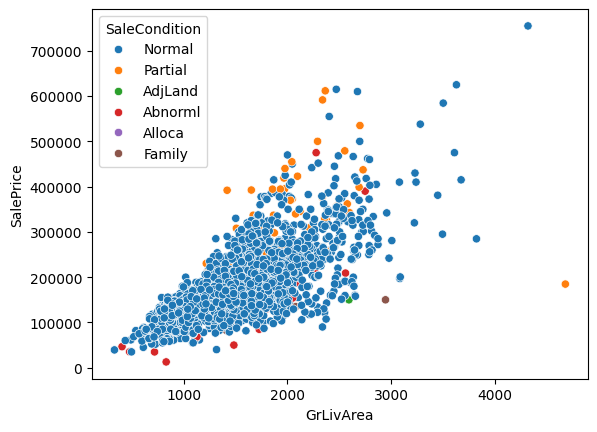

In [6]:
sns.scatterplot(data=housing, x='GrLivArea', y='SalePrice', hue='SaleCondition')

### Add Quarter column to detect seasonality

In [7]:
housing.loc[:,'QrtSold'] = pd.cut(
    housing['MoSold'],
    bins=[0, 3, 6, 9, 12],
    labels=['Q1', 'Q2', 'Q3', 'Q4'],
    include_lowest=True
)
housing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,QrtSold
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,Q1
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,Q1
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,Q4
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,Q2
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,Q2
760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,Q2
761,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,Q3
762,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,Q3


In [10]:
monthly_counts = housing['MoSold'].value_counts().sort_index()
print(monthly_counts)

quarterly_counts = (
    housing
    .groupby(['YrSold', 'QrtSold'])
    .size()
    .reset_index(name='SalesCount')
    .sort_values(['YrSold', 'QrtSold'])
)

quarterly_counts

MoSold
1     101
2     121
3     209
4     252
5     363
6     459
7     400
8     193
9     131
10    148
11    117
12     86
Name: count, dtype: int64


/var/folders/4s/xd_3ly695k1gl73bn_9m85j40000gn/T/ipykernel_4875/2235051608.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['YrSold', 'QrtSold'])


,YrSold,QrtSold,SalesCount
0,2006,Q1,76
1,2006,Q2,198
2,2006,Q3,160
3,2006,Q4,82
4,2007,Q1,99
5,2007,Q2,222
6,2007,Q3,187
7,2007,Q4,92
8,2008,Q1,79
9,2008,Q2,234


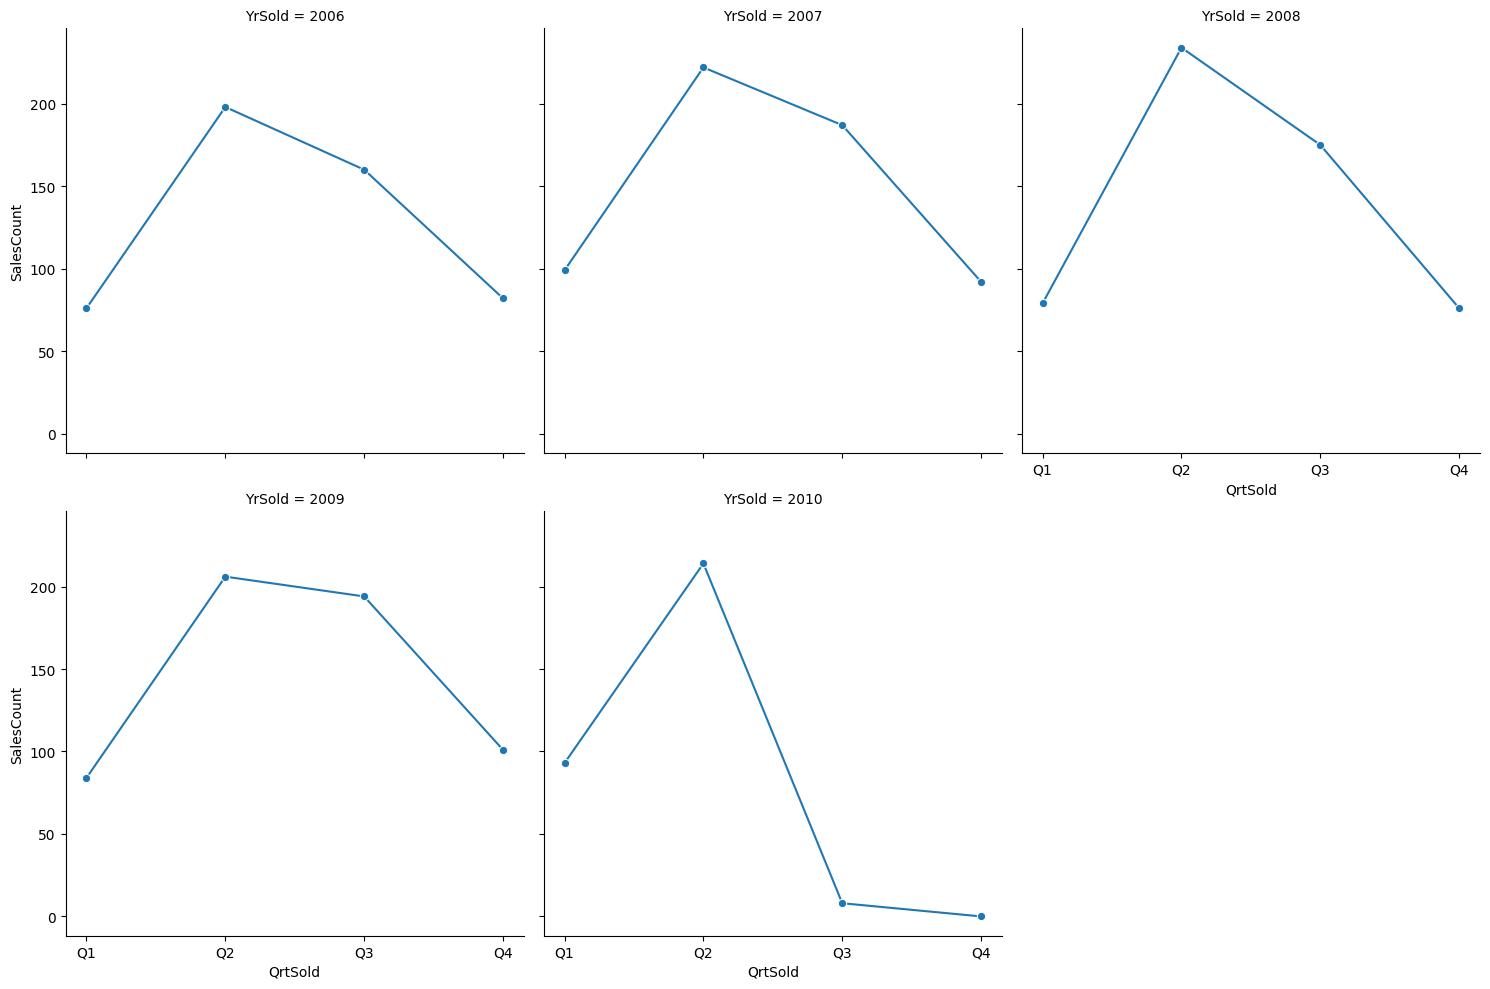

In [9]:
sns.relplot(data=quarterly_counts, x='QrtSold', y='SalesCount', col='YrSold', kind='line', marker='o', col_wrap=3)

# across all these years, second quarter always had the most sales 